In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
import math

# Step 1: Load CIFAR-10 dataset and normalize
(x_train, _), (x_test, _) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 2: Define encoder
input_img = Input(shape=(32, 32, 3))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)  # Output shape: (8, 8, 16)

# Step 3: Define decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

# Step 4: Create autoencoder model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='mse')

# Step 5: Train the model
history = autoencoder.fit(x_train, x_train,
                          epochs=20,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test, x_test),
                          verbose=1)

# Step 6: Predict reconstructed images
decoded_imgs = autoencoder.predict(x_test)



#Reconstructure Score
# Flatten image arrays for MSE calculation
x_test_flat = x_test.reshape(len(x_test), -1)
decoded_imgs_flat = decoded_imgs.reshape(len(decoded_imgs), -1)

# Calculate average MSE across all test images
mse_score = mean_squared_error(x_test_flat, decoded_imgs_flat)
print(f"Average Reconstruction MSE: {mse_score:.4f}")



Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0232 - val_loss: 0.0080
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0074 - val_loss: 0.0064
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.0063 - val_loss: 0.0058
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0058 - val_loss: 0.0055
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0049 - val_loss: 0.0047
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0047 - val_loss: 0.0046
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0046 - val_loss: 0.0044
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0045 - val_loss: 0.0046
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0044 - val_loss: 0.0043
Epoch 12/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/st

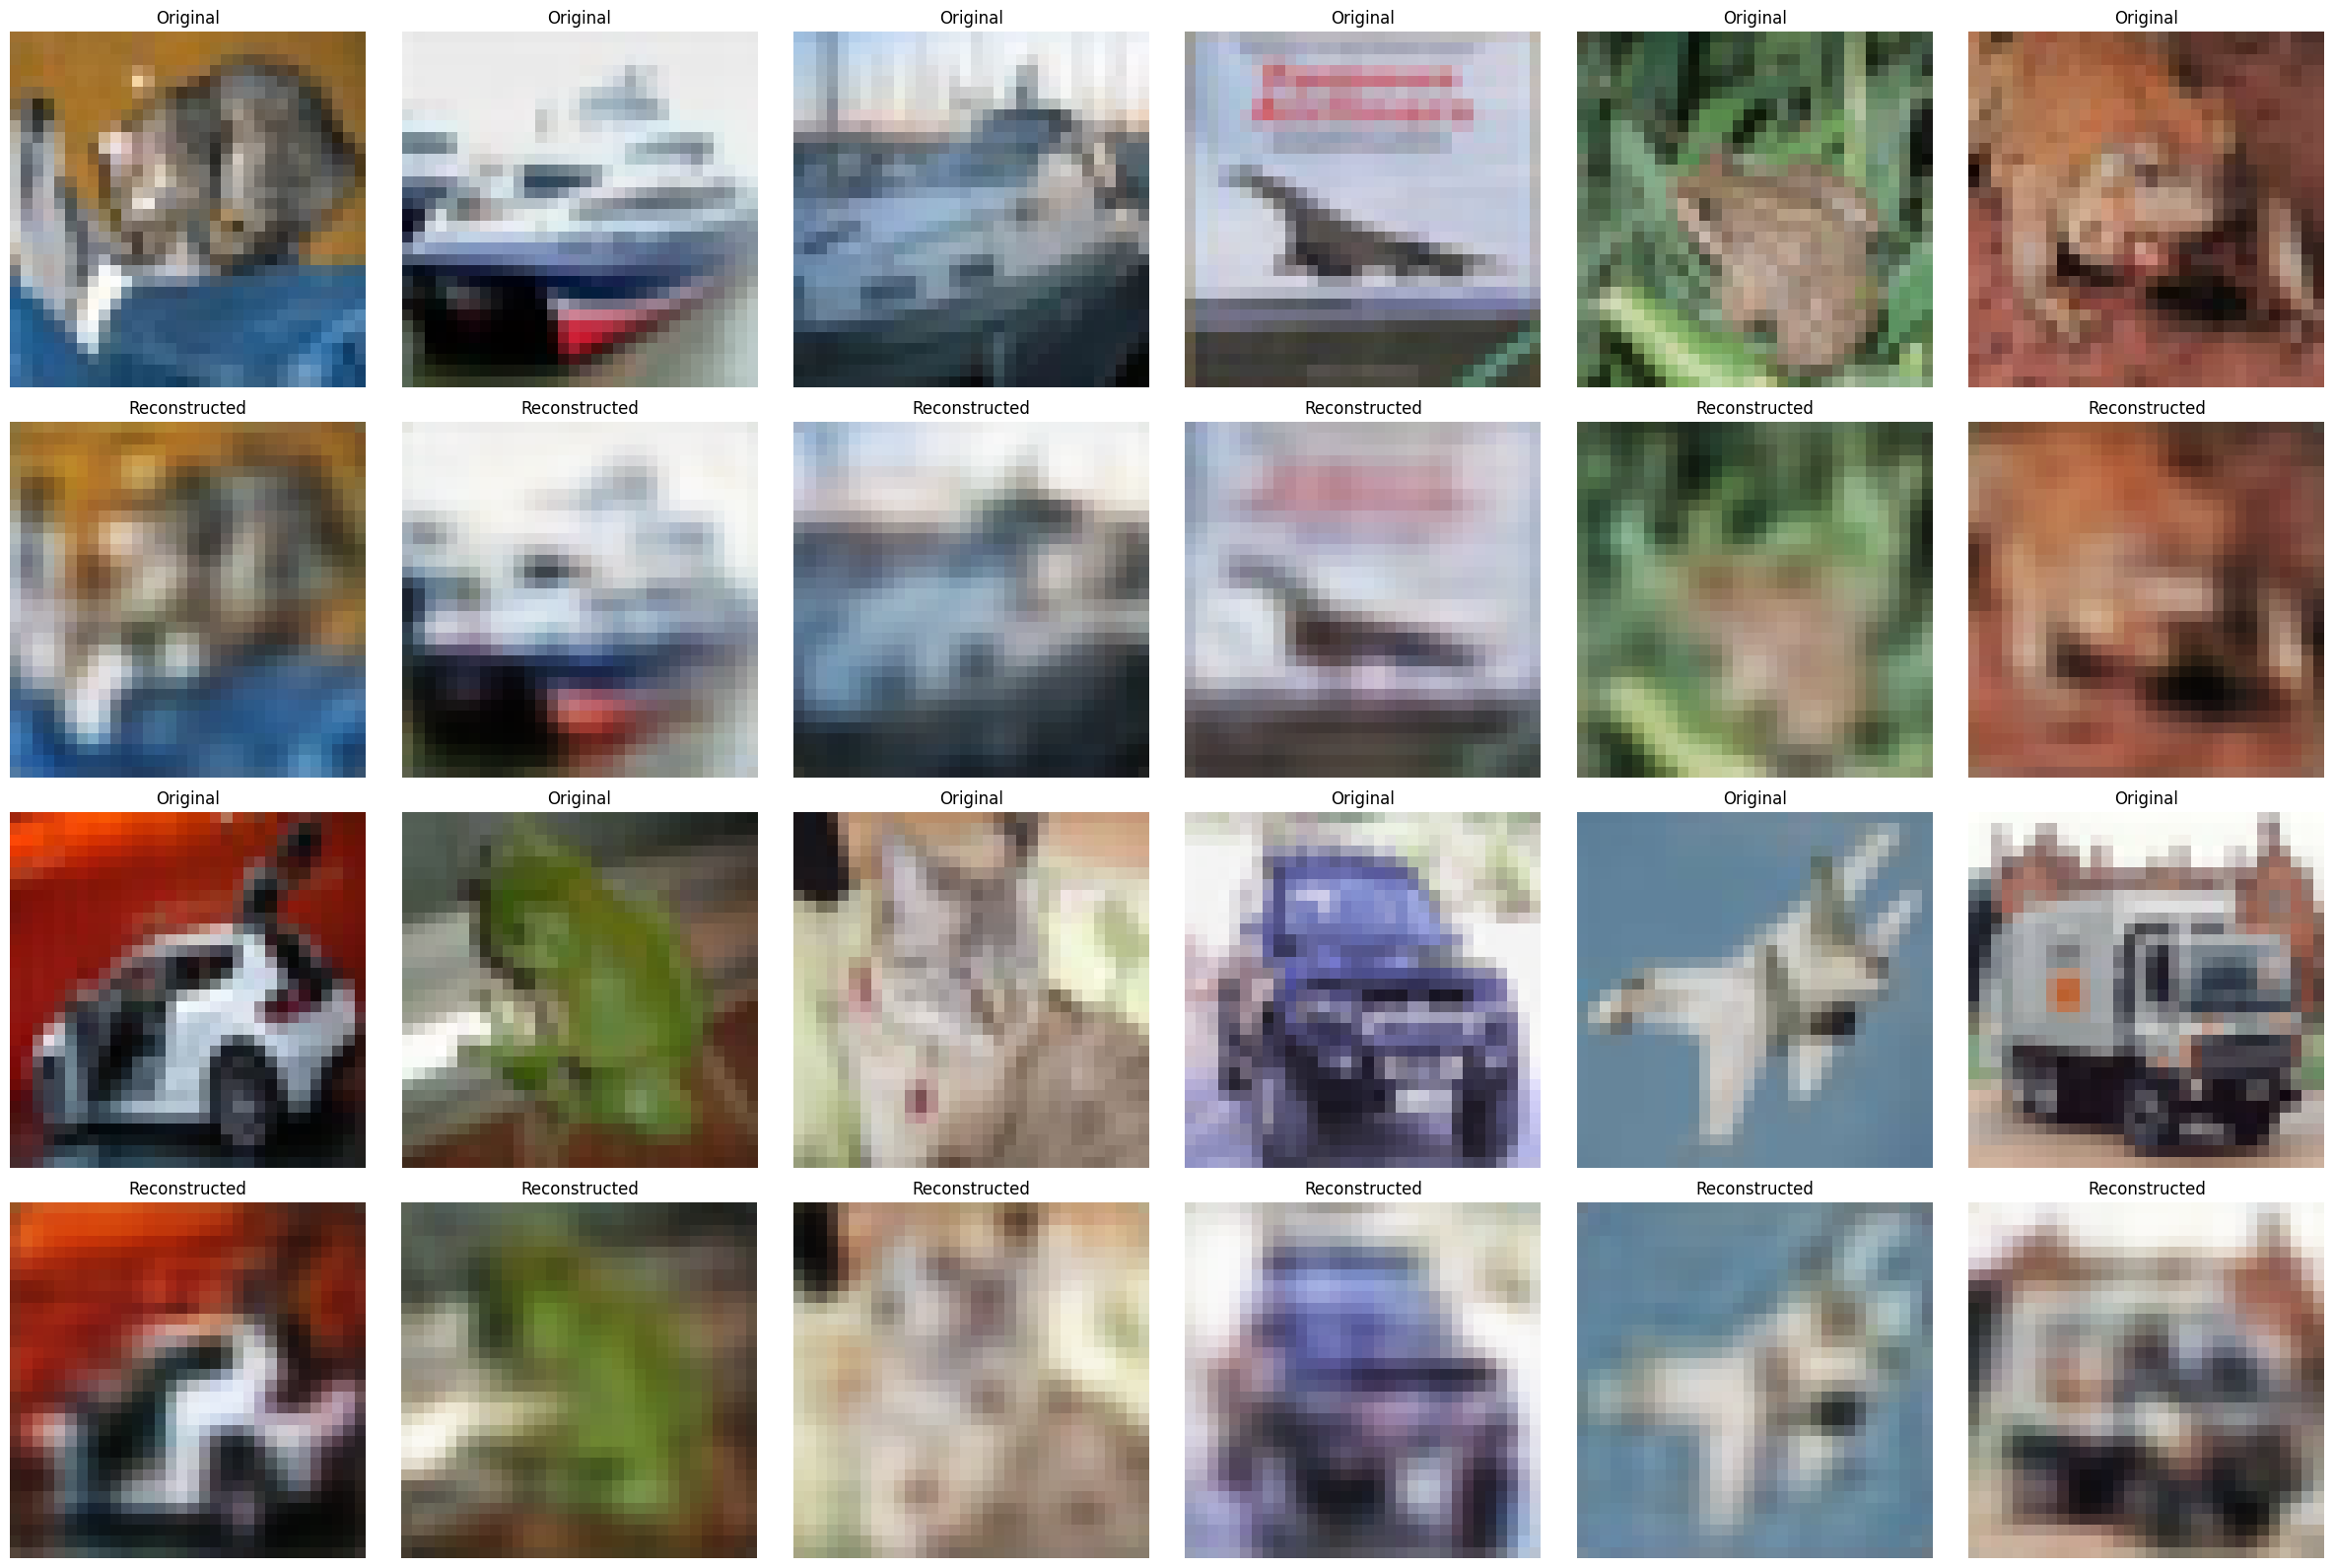

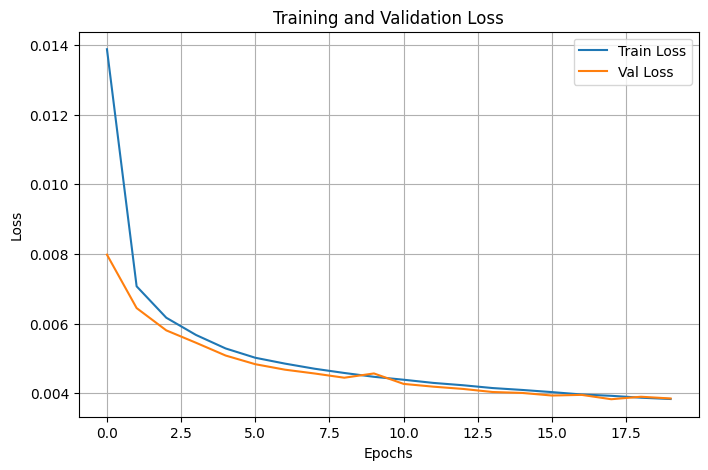

In [15]:
import math
import matplotlib.pyplot as plt

n = 12  # total number of images to display (original + reconstructed pairs)
cols = 6  # number of image pairs per row
rows = math.ceil(n / cols)

# Each pair has 2 rows (Original, Reconstructed), so total subplot rows = 2 * rows
plt.figure(figsize=(4 * cols, 4 * 2 * rows))  # height doubled to keep image size same

for i in range(n):
    col = i % cols
    row = i // cols

    # Index for subplot (top image: original)
    ax = plt.subplot(rows * 2, cols, row * cols * 2 + col + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

    # Index for subplot (bottom image: reconstructed)
    ax = plt.subplot(rows * 2, cols, row * cols * 2 + col + 1 + cols)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis("off")

plt.tight_layout()
plt.savefig("original_vs_reconstructed.png")
plt.show()

# Plot training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.grid(True)
plt.savefig("training_loss.png")
plt.show()
